# Visualize 3D Points (Parabolic data)
This notebook uses 3D plots to visualize 3D points. Reads measurement data from a csv file.

In [4]:
%matplotlib notebook
##%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from filter.kalman import KalmanBB

fmt = lambda x: "%9.3f" % x
np.set_printoptions(formatter={'float_kind':fmt})

## Read from csv file
import pandas as pd


## Read and Prepare Data
Read ball tracking position data from saved CSV file and prepare mx,my,mz. The file should have dT values along with X,Y,Z values.

We use these as measurements and use Kalman3D tracker to track the ball. Once we exhaust all measurements, we use Kalman3D to predict rest of the trajectory.
*Note*: The position data that we are using is in millimeters and milliseconds. However, the Kalman3D tracker uses all values in meters and seconds. We have do to this conversion here.

In [5]:
# File containing 3D points predicted and measured. Last column with time passage will be ignored
data_ = pd.read_csv('data/input_positions_bb.csv')  ## Real data
print(data_.keys())
data = data_/1000.
mx = 1.5 - np.float32(data['mx'])
my = np.float32(data['my'])
mw = np.float32(data['mw'])
mh = np.float32(data['mh'])
print("mx: {} {}".format(mx.shape, mx))
print("my: {} {}".format(my.shape, my))
print("mw: {} {}".format(mw.shape, mw))
print("mh: {} {}".format(mh.shape, mh))
mw = np.float32([    0.602,     0.608,     0.614,     0.616,     0.612,     0.620,     0.634,
     0.639,     0.645,     0.646,     0.649,     0.665,     0.684,     0.703,
     0.715,     0.736,     0.743,     0.763,     0.773,     0.794,     0.803,
     0.832,     0.843,     0.866,     0.873,     0.894,     0.902,     0.921,
     0.942])
mh = np.float32([    0.594,     0.613,     0.620,     0.632,     0.648,     0.654,     0.660,
     0.666,     0.670,     0.677,     0.682,     0.695,     0.710,     0.726,
     0.734,     0.732,     0.752,     0.771,     0.764,     0.788,     0.799,
     0.835,     0.841,     0.860,     0.876,     0.892,     0.918,     0.923,
     0.948])
    
def getpos(i, x,y,w,h):
    return(np.float32([x[i],y[i],w[i],h[i]]))

Index(['mx', 'my', 'mw', 'mh'], dtype='object')
mx: (29,) [    0.069     0.076     0.083     0.093     0.098     0.116     0.119
     0.128     0.138     0.142     0.151     0.155     0.162     0.173
     0.175     0.184     0.186     0.196     0.204     0.209     0.217
     0.227     0.233     0.239     0.247     0.256     0.261     0.267
     0.276]
my: (29,) [    0.430     0.472     0.513     0.549     0.586     0.650     0.684
     0.715     0.745     0.768     0.789     0.811     0.825     0.848
     0.864     0.880     0.893     0.900     0.900     0.913     0.919
     0.927     0.931     0.934     0.937     0.927     0.926     0.926
     0.917]
mw: (29,) [    0.602     0.615     0.633     0.640     0.679     0.654     0.643
     0.624     0.645     0.634     0.649     0.665     0.684     0.703
     0.715     0.736     0.743     0.763     0.773     0.794     0.803
     0.832     0.843     0.866     0.873     0.894     0.902     0.921
     0.942]
mh: (29,) [    0.594     0.613    

## Track and Predict
Now we use our Kalman3D tracker to  track the position of the ball based on measured data and then predict the trajectory when all measurement data is exhausted.

In [6]:
fps = 300.
dT  = (1 / fps)
print("dT: {:f}".format(dT))
KF = KalmanBB()
pred = KF.init(getpos(0,mx,my,mw,mh))
print("pred: {}".format(pred))
##-#######################################################################################
## Tracking
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
px = np.float32([pred[0]])
py = np.float32([pred[1]])
pw = np.float32([pred[2]])
ph = np.float32([pred[3]])
for i in range(len(mx)-1):
    pred = KF.track(mx[i], my[i], mw[i],  mh[i], dT)
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pw = np.append(pw, pred[2])
    ph = np.append(ph, pred[3])
    print("  tracked position : {}".format(pred*1000))

##-#######################################################################################
## Trajectory prediction
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
for ii in range(15):
    pred = KF.predict(dT)   # Use last value of dT for all predictions
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pw = np.append(pw, pred[2])
    ph = np.append(ph, pred[3])
    print("predicted position : {}".format(pred*1000))

dT: 0.003333
pred: [    0.069     0.430     0.602     0.594]
  tracked position : [   69.000   430.000   602.000   594.000]
  tracked position : [   70.338   438.030   603.147   597.633]
  tracked position : [   73.389   456.091   605.762   603.022]
  tracked position : [   78.669   481.115   608.521   610.828]
  tracked position : [   84.185   511.035   609.523   621.427]
  tracked position : [   93.537   551.922   612.606   631.034]
  tracked position : [  101.199   591.631   619.002   639.771]
  tracked position : [  109.387   629.365   625.082   647.826]
  tracked position : [  118.240   665.293   631.225   654.768]
  tracked position : [  125.738   697.780   635.888   661.821]
  tracked position : [  133.800   727.205   640.108   668.344]
  tracked position : [  140.731   754.770   648.008   676.951]
  tracked position : [  147.787   778.558   659.456   687.661]
  tracked position : [  156.174   802.459   673.432   700.182]
  tracked position : [  162.712   824.273   687.034   711

px size (44,)
tm size (44,)
PX, MX


<IPython.core.display.Javascript object>


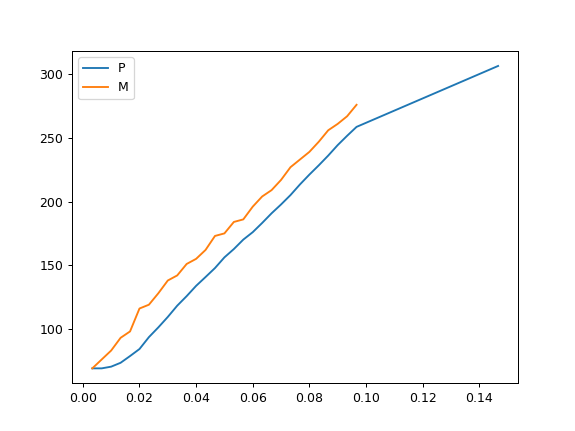

PY, MY


<IPython.core.display.Javascript object>


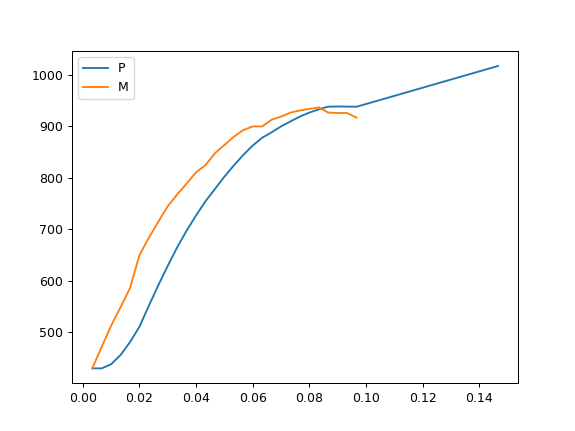

PW, MW


<IPython.core.display.Javascript object>


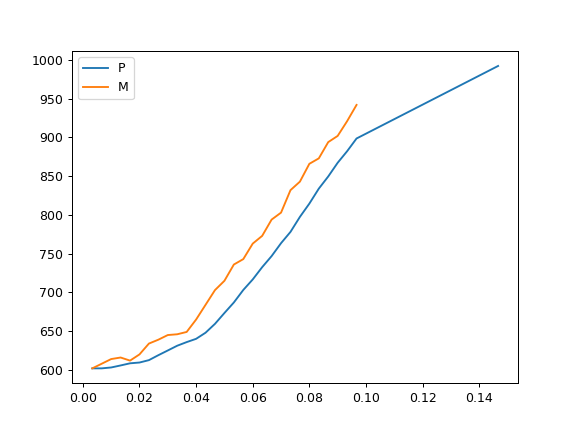

PH, MH


<IPython.core.display.Javascript object>


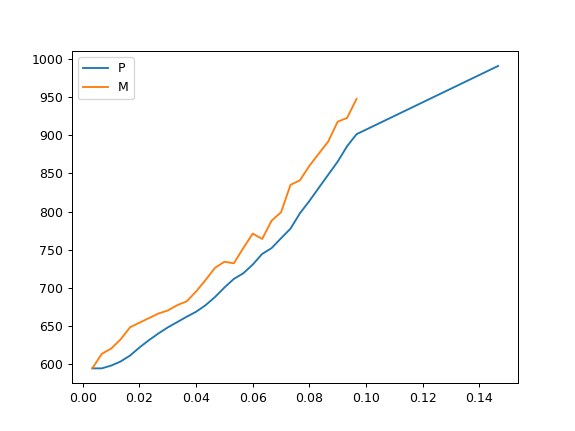

In [7]:
sum = 0
tm  = np.zeros(len(px))
for i in range(len(tm)):
    sum += dT
    tm[i] = sum

## Convert mx also back to millimeters.
px = px * 1000.
py = py * 1000.
pw = pw * 1000.
ph = ph * 1000.
nmx = mx * 1000.
nmy = my * 1000.
nmw = mw * 1000.
nmh = mh * 1000.
ntm = tm * 1000.
##-#######################################################################################
## Everything is in millimeters and milliseconds now
##-#######################################################################################
print("px size", px.shape)
print("tm size", tm.shape)

## Visualize X, Y, and Z individually
## In the plot below, we visualize the pairs of px, mx; py, my and pz, mz to see how they relate to each other
print("PX, MX")
fig1a = plt.figure()
plt.plot(tm, px)
plt.plot(tm[0:len(nmx)], nmx)
plt.legend('PM', ncol=1, loc='upper left')

print("PY, MY")
fig1b = plt.figure()
plt.plot(tm, py)
plt.plot(tm[0:len(nmy)], nmy)
plt.legend('PM', ncol=1, loc='upper left')

print("PW, MW")
fig1c = plt.figure()
plt.plot(tm, pw)
plt.plot(tm[0:len(nmw)], nmw)
plt.legend('PM', ncol=1, loc='upper left')

print("PH, MH")
fig1c = plt.figure()
plt.plot(tm, ph)
plt.plot(tm[0:len(nmh)], nmh)
plt.legend('PM', ncol=1, loc='upper left')

## Visualize (X,Y,Z) of Predicted and Measured in Points in 3D
In the plot below, we visualize all the predicted and measured points in 3D. This gives a more realistic view of how the predicted points are related to the measured points.

<IPython.core.display.Javascript object>


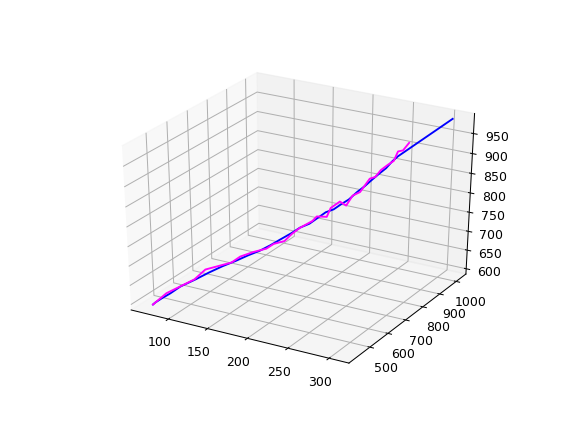

In [8]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
#ax.set_xlim3d(-2000,2000)
#ax.set_ylim3d(-2000,2000)
#ax.set_zlim3d(-2000,2000)

if 0: ## Plot axis or not
    st = [0,0,0]
    xx = [200,   0,   0]
    yy = [  0, 200,   0]
    hh  =[  0,   0, 200]
    for i in range(len(st)):
        ax.plot([st[i], xx[i]], [st[i],yy[i]],hs=[st[i],hh[i]])

ax.plot3D(px, py, ph, 'blue')
ax.plot3D(nmx, nmy, nmh, 'magenta')
